C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


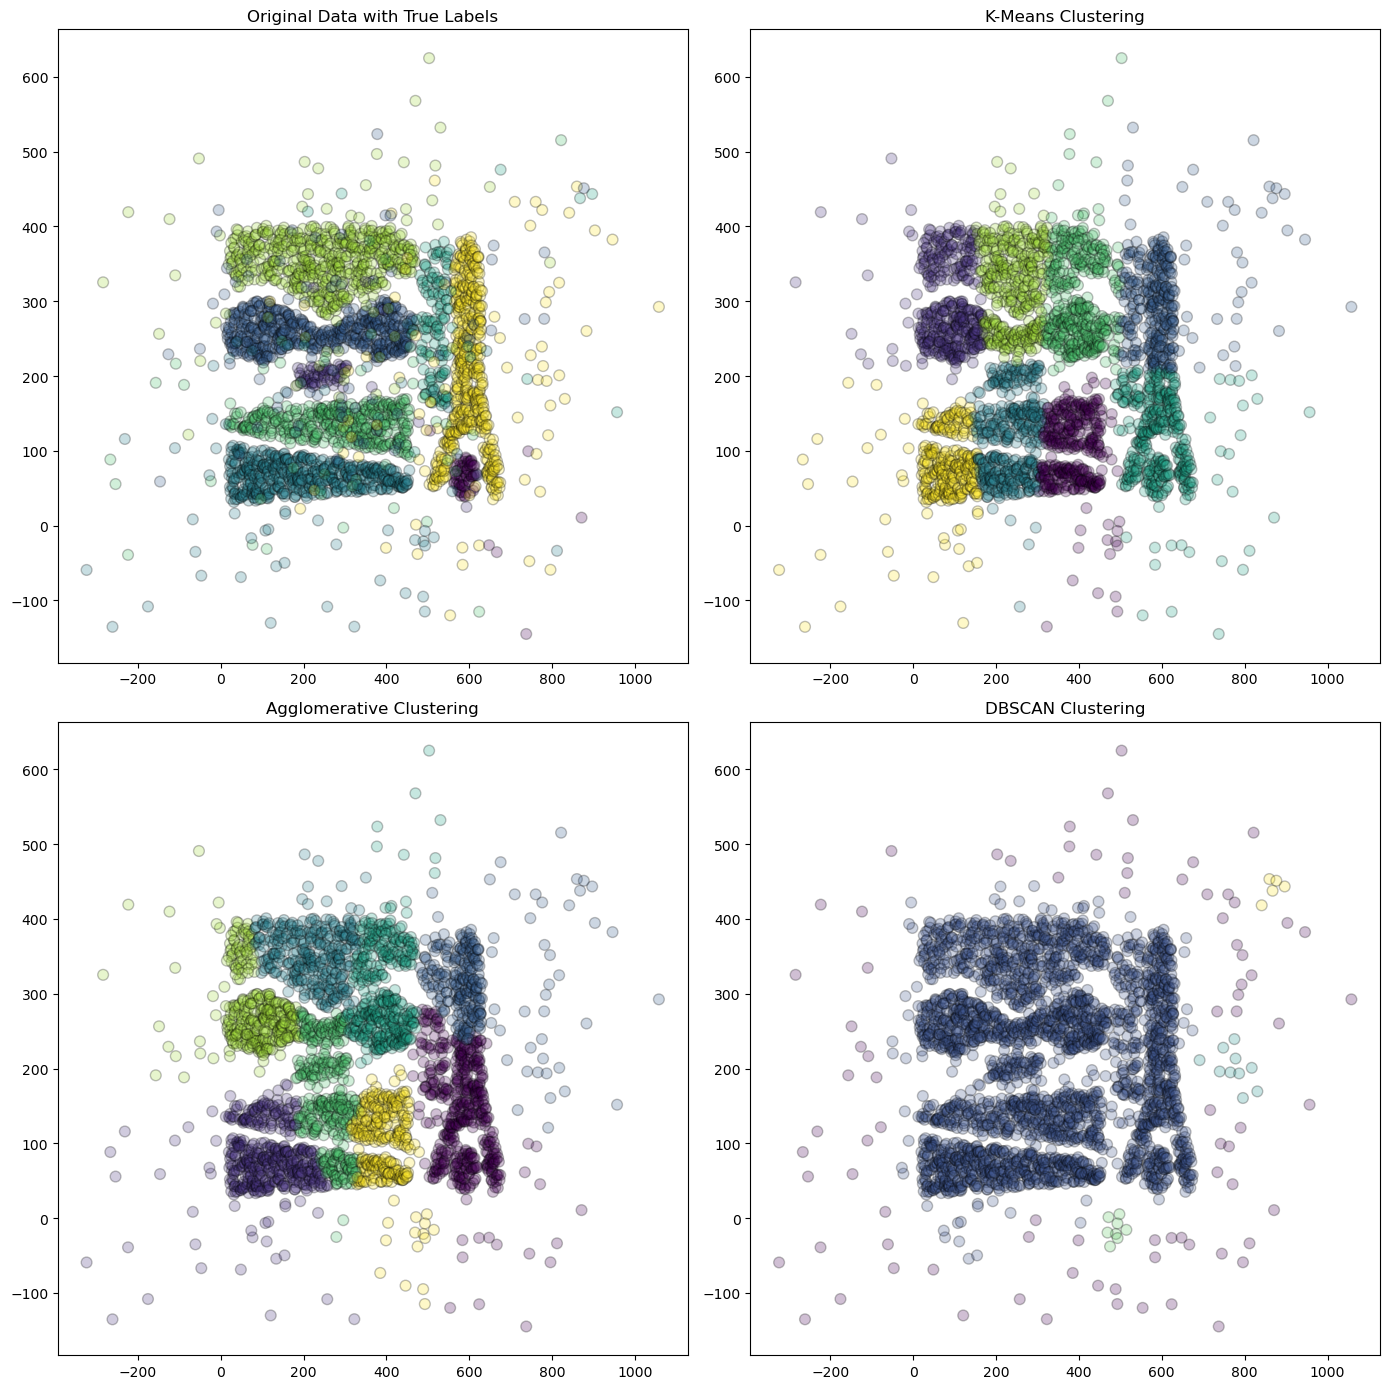

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Complex8_N15.csv')

# Extract the features and the true labels
X = df[['V1', 'V2']].values
y_true = df['V3'].values

# Normalize the dataset for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create subplots for comparison
fig, axs = plt.subplots(2, 2, figsize=(14, 14), dpi=100)

# Plot original data with true labels
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.25, s=60, linewidths=1, edgecolors='black')
axs[0, 0].set_title('Original Data with True Labels')

# K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
y_kmeans = kmeans.fit_predict(X)
axs[0, 1].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', alpha=0.25, s=60, linewidths=1, edgecolors='black')
axs[0, 1].set_title('K-Means Clustering')

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=8)
y_agglo = agglo.fit_predict(X)
axs[1, 0].scatter(X[:, 0], X[:, 1], c=y_agglo, cmap='viridis', alpha=0.25, s=60, linewidths=1, edgecolors='black')
axs[1, 0].set_title('Agglomerative Clustering')

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(X_scaled)
axs[1, 1].scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis', alpha=0.25, s=60, linewidths=1, edgecolors='black')
axs[1, 1].set_title('DBSCAN Clustering')

# Adjust layout and show plot
plt.tight_layout()
plt.show()